# Goals
- Markov chains
- Continuous limit
- Continuous probability distributions
- Probability density function

# Markov chains
- Let's think back to modelling recovery:
- At each step, with probability *p* you recover
- Call infected state 0, recovery state 1
- Then have directed **transition graph** 

$0   \underrightarrow{p}   1$

Notations:
- $X_n$ is state at time $n$
- $X_0 = 0$ (infected)

Let $P_i^{(n)}$ be $P(X_n = i)$ = probability that in state $i$ at time $n$

Then

$P_0^{n+1} = (1 - p) P_0^{(n)}$

$P_1^{(n+1)} = p P_0^n + 1 P_1^{(n)}$

Have

$P_j^{(n+1)} = \sum_{i} p_{i \to j} P_i^{(n)}$


Set **P**$_n := [ P_0^{(n)} P_1^{(n)} ]$ 

Then

**P**$_n  = $ **P**$_n M$ 

With **transition matrix** $M := (p_{i \to j})$

We have a **stochastic matrix**

$$
M = 
\begin{pmatrix}
1 - p & p\\
0 & 1
\end{pmatrix}
$$

Sum of entries in row $i = 1, \forall i$

$\sum_{j} p(i \to j) = 1, \forall i$

In [3]:
p = 0.1

M = [1-p p 
    0 1]

2×2 Matrix{Float64}:
 0.9  0.1
 0.0  1.0

In [4]:
P₀ = [1.0 0.0]

1×2 Matrix{Float64}:
 1.0  0.0

In [5]:
P₁ = P₀ * M

1×2 Matrix{Float64}:
 0.9  0.1

In [6]:
P₂ = P₁ * M

1×2 Matrix{Float64}:
 0.81  0.19

In [7]:
P₃ = P₂ * M

1×2 Matrix{Float64}:
 0.729  0.271

In [8]:
function dynamics(P₀, M, n)
    P = copy(P₀)
    
    for i in 1:n
        Pₙ = P * M
        P, Pₙ = Pₙ, P # swaps "pointers" P and Pn
    end
    
    return P
end

dynamics (generic function with 1 method)

In [9]:
dynamics(P₀, M, 1)

1×2 Matrix{Float64}:
 0.9  0.1

In [10]:
dynamics(P₀, M, 2)

1×2 Matrix{Float64}:
 0.81  0.19

In [11]:
dynamics(P₀, M, 10)

1×2 Matrix{Float64}:
 0.348678  0.651322

In [12]:
dynamics(P₀, M, 100)

1×2 Matrix{Float64}:
 2.65614e-5  0.999973

In [13]:
0.9^100

2.6561398887587544e-5

$$P_0^{(n)} = (1 - p)^{(n-1)}$$

Suppose small chance of re-infection after recovery

In [14]:
M = [1-p p 
    0.01 0.99]

2×2 Matrix{Float64}:
 0.9   0.1
 0.01  0.99

In [16]:
data = [dynamics(P₀, M, n) for n in 1:1000]

1000-element Vector{Matrix{Float64}}:
 [0.9 0.1]
 [0.811 0.189]
 [0.73179 0.26821]
 [0.6612931000000001 0.33870690000000003]
 [0.598550859 0.40144914100000006]
 [0.54271026451 0.45728973549000007]
 [0.49301213541390004 0.5069878645861001]
 [0.44878080051837105 0.5512191994816291]
 [0.40941491246135026 0.5905850875386499]
 [0.37437927209060173 0.6256207279093984]
 [0.3431975521606356 0.6568024478393646]
 [0.3154458214229657 0.6845541785770345]
 [0.2907467810664395 0.7092532189335607]
 ⋮
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]
 [0.09090909090909075 0.9090909090909072]

**Stationary state**
Unchanging probability vector $\to$ **eigenvector** $v$ of the transition matrix:

$$M v = \lambda v$$

In [17]:
v = data[end]

1×2 Matrix{Float64}:
 0.0909091  0.909091

In [18]:
v * M 

1×2 Matrix{Float64}:
 0.0909091  0.909091

In [19]:
v * M == v

true

In [20]:
v * M == 1.0 .* v # eigenvector with eigenvalue 1

true

## Continuous limit

Back to the recovery model. We have talking about the number of people that recover each *day*

$A \rightarrow B$

Chemical reactions: **Continuous time**: $t \in \mathbb{R}$

Probability of recovery at time $n$ is $p_n (1-p)^{n-1}$

**Cumulative** Probability of having recovered at some time <= $n$:

$s_N := \sum_{n=1}^N p_n$

In [4]:
p = 0.1

probs = [p .* (1 - p)^(n-1) for n in 1:20]

20-element Vector{Float64}:
 0.1
 0.09000000000000001
 0.08100000000000002
 0.0729
 0.06561000000000002
 0.05904900000000001
 0.05314410000000001
 0.04782969000000001
 0.04304672100000001
 0.03874204890000001
 0.03486784401000001
 0.031381059609000006
 0.028242953648100012
 0.02541865828329001
 0.02287679245496101
 0.02058911320946491
 0.018530201888518418
 0.016677181699666577
 0.015009463529699918
 0.013508517176729929

In [5]:
s = cumsum(probs)

20-element Vector{Float64}:
 0.1
 0.19
 0.271
 0.3439000000000001
 0.40951000000000004
 0.46855900000000006
 0.5217031000000001
 0.5695327900000001
 0.6125795110000002
 0.6513215599000002
 0.6861894039100002
 0.7175704635190002
 0.7458134171671003
 0.7712320754503903
 0.7941088679053513
 0.8146979811148162
 0.8332281830033346
 0.8499053647030012
 0.864914828232701
 0.878423345409431

In [6]:
using Plots

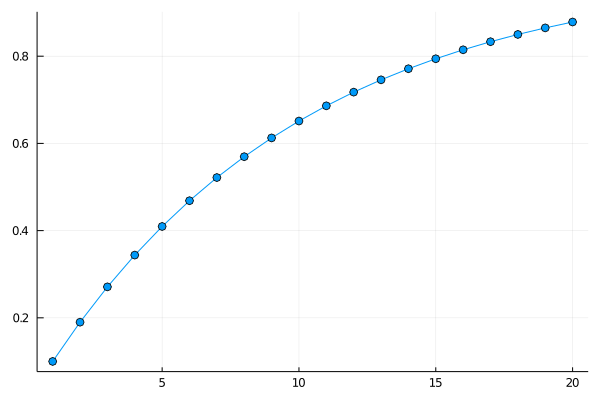

In [7]:
plot(s, m=:o, leg=false)

In [10]:
ys = [0; reduce(vcat, [ [s[n],s[n]] for n in 1:20])];

pop!(ys)
pushfirst!(ys,0)

41-element Vector{Float64}:
 0.0
 0.0
 0.1
 0.1
 0.19
 0.19
 0.271
 0.271
 0.3439000000000001
 0.3439000000000001
 0.40951000000000004
 0.40951000000000004
 0.46855900000000006
 ⋮
 0.7712320754503903
 0.7941088679053513
 0.7941088679053513
 0.8146979811148162
 0.8146979811148162
 0.8332281830033346
 0.8332281830033346
 0.8499053647030012
 0.8499053647030012
 0.864914828232701
 0.864914828232701
 0.878423345409431

In [11]:
xs = [0; reduce(vcat, [ [n,n] for n in 1:20])];

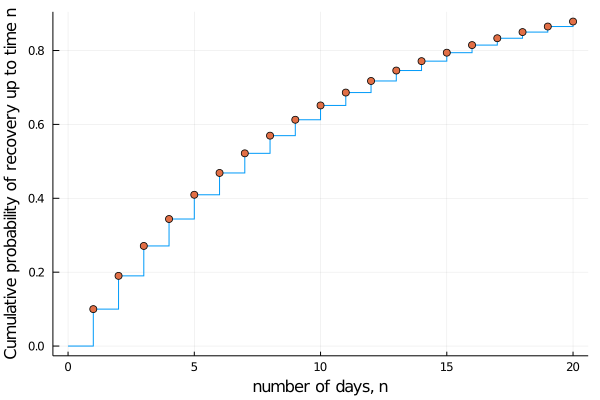

In [15]:
plot(xs, ys, leg = false)
scatter!(s)
ylabel!("Cumulative probability of recovery up to time n")
xlabel!("number of days, n")

Think of our discrete-time process in steps, not of days, but of a time $\delta$

Instead of "cumulative probability that we have decayed by day $n$", want to talk about "cumulative probability that we have decayed by day $n\delta$"

What is the probability $p(\delta)$ of recovering in time $\delta$